In [22]:
%matplotlib inline
import sklearn
import numpy as np
import pandas as pd
import matplotlib as plt
from tensorflow import keras
from tensorflow.keras import layers
import random
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models  import Sequential
from keras.layers import MaxPool2D, Dense, Flatten, Dropout, Input, Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adamax, Adam
import tensorflow as tf
from matplotlib import pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [24]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [25]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

x_train = x_train/255
x_test = x_test/255
from tensorflow.keras.utils import to_categorical
y_train_ct = to_categorical(y_train)
y_test_ct = to_categorical(y_test)

In [26]:
from tensorflow.keras.metrics import Recall
epochs=75
Adamax = keras.optimizers.Adamax(learning_rate=0.001)

In [27]:
model = keras.Sequential()
model.add(Conv2D(16,  (3, 3), input_shape=x_train.shape[1:], activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32,  (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64,  (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer = Adamax, loss = 'categorical_crossentropy', metrics = Recall())


In [28]:
history = model.fit(x_train, y_train_ct, epochs=epochs, validation_split=0.25, batch_size=128, shuffle=True)

Epoch 1/75
293/293 [==============================] - 3s 8ms/step - loss: 1.9441 - recall_3: 0.0171 - val_loss: 1.7615 - val_recall_3: 0.0488
Epoch 2/75
293/293 [==============================] - 2s 7ms/step - loss: 1.6757 - recall_3: 0.0855 - val_loss: 1.6067 - val_recall_3: 0.1084
Epoch 3/75
293/293 [==============================] - 2s 7ms/step - loss: 1.5518 - recall_3: 0.1455 - val_loss: 1.5111 - val_recall_3: 0.1788
Epoch 4/75
293/293 [==============================] - 2s 7ms/step - loss: 1.4662 - recall_3: 0.2016 - val_loss: 1.4446 - val_recall_3: 0.2130
Epoch 5/75
293/293 [==============================] - 2s 7ms/step - loss: 1.4087 - recall_3: 0.2439 - val_loss: 1.4139 - val_recall_3: 0.2541
Epoch 6/75
293/293 [==============================] - 2s 7ms/step - loss: 1.3553 - recall_3: 0.2819 - val_loss: 1.3676 - val_recall_3: 0.2786
Epoch 7/75
293/293 [==============================] - 2s 7ms/step - loss: 1.3213 - recall_3: 0.3077 - val_loss: 1.3215 - val_recall_3: 0.2962
Epoch 

In [29]:
y_pred = model.predict(x_test)

In [30]:
model.evaluate(x_test,y_test_ct,)

313/313 [==============================] - 1s 3ms/step - loss: 1.0091 - recall_3: 0.6319


[1.0090570449829102, 0.6319000124931335]

In [31]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

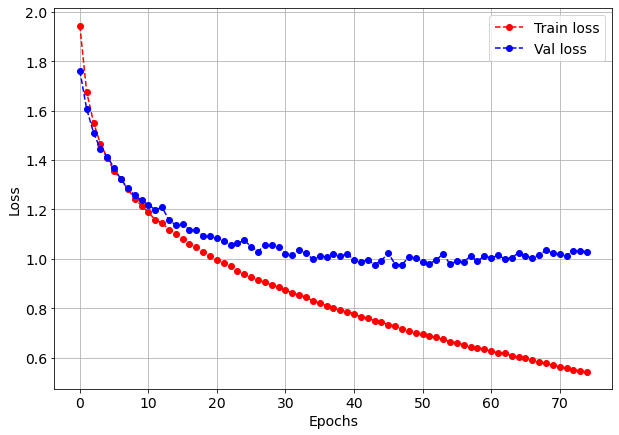

In [32]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
plt.plot(range(0, epochs), train_loss, 'ro--', label='Train loss');
plt.plot(range(0, epochs), val_loss, 'bo--',label='Val loss');
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()